In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
taxi_owner = pd.read_pickle('taxi_owners.p')
taxi_owner.head()

,rid,vid,owner,address,zip
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618


In [28]:
homelessness = pd.read_csv('homelessness.csv')
homelessness.head()

,Unnamed: 0,region,state,individuals,family_members,state_pop
0,0,East South Central,Alabama,2570.0,864.0,4887681
1,1,Pacific,Alaska,1434.0,582.0,735139
2,2,Mountain,Arizona,7259.0,2606.0,7158024
3,3,West South Central,Arkansas,2280.0,432.0,3009733
4,4,Pacific,California,109008.0,20964.0,39461588


In [8]:
homelessness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      51 non-null     int64  
 1   region          51 non-null     object 
 2   state           51 non-null     object 
 3   individuals     51 non-null     float64
 4   family_members  51 non-null     float64
 5   state_pop       51 non-null     int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 2.5+ KB


In [9]:
homelessness.describe()

,Unnamed: 0,individuals,family_members,state_pop
count,51.000000,51.000000,51.000000,5.100000e+01
mean,25.000000,7225.784314,3504.882353,6.405637e+06
std,14.866069,15991.025083,7805.411811,7.327258e+06
min,0.000000,434.000000,75.000000,5.776010e+05
25%,12.500000,1446.500000,592.000000,1.777414e+06
50%,25.000000,3082.000000,1482.000000,4.461153e+06
75%,37.500000,6781.500000,3196.000000,7.340946e+06
max,50.000000,109008.000000,52070.000000,3.946159e+07


In [11]:
#Q1
homelessness_ind = homelessness.sort_values(by='individuals')
homelessness_ind.head()

,Unnamed: 0,region,state,individuals,family_members,state_pop
50,50,Mountain,Wyoming,434.0,205.0,577601
34,34,West North Central,North Dakota,467.0,75.0,758080
7,7,South Atlantic,Delaware,708.0,374.0,965479
39,39,New England,Rhode Island,747.0,354.0,1058287
45,45,New England,Vermont,780.0,511.0,624358


In [13]:
#Q2
homelessness_fam = homelessness.sort_values(by='family_members', ascending=False)
homelessness_fam.head()

,Unnamed: 0,region,state,individuals,family_members,state_pop
32,32,Mid-Atlantic,New York,39827.0,52070.0,19530351
4,4,Pacific,California,109008.0,20964.0,39461588
21,21,New England,Massachusetts,6811.0,13257.0,6882635
9,9,South Atlantic,Florida,21443.0,9587.0,21244317
43,43,West South Central,Texas,19199.0,6111.0,28628666


In [17]:
#Q3
homelessness_reg_fam = homelessness.sort_values(by=['region','family_members'], ascending=[True, False])
homelessness_reg_fam.head()

,Unnamed: 0,region,state,individuals,family_members,state_pop
13,13,East North Central,Illinois,6752.0,3891.0,12723071
35,35,East North Central,Ohio,6929.0,3320.0,11676341
22,22,East North Central,Michigan,5209.0,3142.0,9984072
49,49,East North Central,Wisconsin,2740.0,2167.0,5807406
14,14,East North Central,Indiana,3776.0,1482.0,6695497


In [18]:
#Q4
state_fam = homelessness[['state', 'family_members']]
state_fam.head()

,state,family_members
0,Alabama,864.0
1,Alaska,582.0
2,Arizona,2606.0
3,Arkansas,432.0
4,California,20964.0


In [19]:
#Q5
int_gt_10k = homelessness[homelessness['individuals'] > 10000]
int_gt_10k.head()

,Unnamed: 0,region,state,individuals,family_members,state_pop
4,4,Pacific,California,109008.0,20964.0,39461588
9,9,South Atlantic,Florida,21443.0,9587.0,21244317
32,32,Mid-Atlantic,New York,39827.0,52070.0,19530351
37,37,Pacific,Oregon,11139.0,3337.0,4181886
43,43,West South Central,Texas,19199.0,6111.0,28628666


In [32]:
#Q6
mountain_reg = homelessness[homelessness['region'] == 'Mountain']
mountain_reg.head()

,Unnamed: 0,region,state,individuals,family_members,state_pop
2,2,Mountain,Arizona,7259.0,2606.0,7158024
5,5,Mountain,Colorado,7607.0,3250.0,5691287
12,12,Mountain,Idaho,1297.0,715.0,1750536
26,26,Mountain,Montana,983.0,422.0,1060665
28,28,Mountain,Nevada,7058.0,486.0,3027341


In [30]:
#Q7
fam_lt_1k_pac = homelessness[(homelessness['family_members'] < 1000) & (homelessness['region'] == 'Pacific')]
fam_lt_1k_pac

,Unnamed: 0,region,state,individuals,family_members,state_pop
1,1,Pacific,Alaska,1434.0,582.0,735139


In [33]:
#Q8
south_mid_atlantic = homelessness[(homelessness['region'] == 'South Atlantic')
                                    |(homelessness['region'] == 'Mid-Atlantic')]
south_mid_atlantic

,Unnamed: 0,region,state,individuals,family_members,state_pop
7,7,South Atlantic,Delaware,708.0,374.0,965479
8,8,South Atlantic,District of Columbia,3770.0,3134.0,701547
9,9,South Atlantic,Florida,21443.0,9587.0,21244317
10,10,South Atlantic,Georgia,6943.0,2556.0,10511131
20,20,South Atlantic,Maryland,4914.0,2230.0,6035802
30,30,Mid-Atlantic,New Jersey,6048.0,3350.0,8886025
32,32,Mid-Atlantic,New York,39827.0,52070.0,19530351
33,33,South Atlantic,North Carolina,6451.0,2817.0,10381615
38,38,Mid-Atlantic,Pennsylvania,8163.0,5349.0,12800922
40,40,South Atlantic,South Carolina,3082.0,851.0,5084156


In [34]:
#Q9
canu = ['California', 'Arizona', 'Nevada', 'Utah']
mojave_homelessness = homelessness[homelessness['state'].isin(canu)]
mojave_homelessness

,Unnamed: 0,region,state,individuals,family_members,state_pop
2,2,Mountain,Arizona,7259.0,2606.0,7158024
4,4,Pacific,California,109008.0,20964.0,39461588
28,28,Mountain,Nevada,7058.0,486.0,3027341
44,44,Mountain,Utah,1904.0,972.0,3153550


In [37]:
#Q10
homelessness['total'] = homelessness['individuals'] + homelessness['family_members']
homelessness.head()

,Unnamed: 0,region,state,individuals,family_members,state_pop,total
0,0,East South Central,Alabama,2570.0,864.0,4887681,3434.0
1,1,Pacific,Alaska,1434.0,582.0,735139,2016.0
2,2,Mountain,Arizona,7259.0,2606.0,7158024,9865.0
3,3,West South Central,Arkansas,2280.0,432.0,3009733,2712.0
4,4,Pacific,California,109008.0,20964.0,39461588,129972.0


In [38]:
#Q11
homelessness['p_individuals'] = homelessness['individuals'] / homelessness['total']
homelessness.head()

,Unnamed: 0,region,state,individuals,family_members,state_pop,total,p_individuals
0,0,East South Central,Alabama,2570.0,864.0,4887681,3434.0,0.748398
1,1,Pacific,Alaska,1434.0,582.0,735139,2016.0,0.711310
2,2,Mountain,Arizona,7259.0,2606.0,7158024,9865.0,0.735834
3,3,West South Central,Arkansas,2280.0,432.0,3009733,2712.0,0.840708
4,4,Pacific,California,109008.0,20964.0,39461588,129972.0,0.838704


In [42]:
#Q12
homelessness['indiv_per_10k'] = 10000 * homelessness['individuals'] / homelessness['state_pop']
high_homelessness = homelessness[homelessness['indiv_per_10k'] > 20]
high_homelessness_srt = high_homelessness.sort_values('indiv_per_10k', ascending=False)
result = high_homelessness_srt[['state','indiv_per_10k']]    
result

,state,indiv_per_10k
8,District of Columbia,53.738381
11,Hawaii,29.079406
4,California,27.623825
37,Oregon,26.636307
28,Nevada,23.314189
47,Washington,21.829195
32,New York,20.392363


In [48]:
sales = pd.read_csv('sales_subset.csv')
sales_1_1 = sales[(sales['department'] == 1) & (sales['store'] == 1)]
sales_1_1 = sales_1_1.sort_values('date')
sales_1_1['cum_weekly_sales'] = sales['weekly_sales'].cumsum()
sales_1_1['cum_max_sales'] = sales['weekly_sales'].cummax()
sales_1_1[['date', 'weekly_sales', 'cum_weekly_sales', 'cum_max_sales']]

,date,weekly_sales,cum_weekly_sales,cum_max_sales
0,2010-02-05,24924.50,24924.50,24924.50
1,2010-03-05,21827.90,46752.40,24924.50
2,2010-04-02,57258.43,104010.83,57258.43
3,2010-05-07,17413.94,121424.77,57258.43
4,2010-06-04,17558.09,138982.86,57258.43
5,2010-07-02,16333.14,155316.00,57258.43
6,2010-08-06,17508.41,172824.41,57258.43
7,2010-09-03,16241.78,189066.19,57258.43
8,2010-10-01,20094.19,209160.38,57258.43
9,2010-11-05,34238.88,243399.26,57258.43


In [57]:
store_types = sales.drop_duplicates(subset=['store','type'])
store_types.head()

,Unnamed: 0,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
901,901,2,A,1,2010-02-05,35034.06,False,4.550000,0.679451,8.324
1798,1798,4,A,1,2010-02-05,38724.42,False,6.533333,0.686319,8.623
2699,2699,6,A,1,2010-02-05,25619.00,False,4.683333,0.679451,7.259
3593,3593,10,B,1,2010-02-05,40212.84,False,12.411111,0.782478,9.765


In [51]:
store_depts = sales.drop_duplicates(subset=['store', 'department'])
store_depts.head()

,Unnamed: 0,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
12,12,1,A,2,2010-02-05,50605.27,False,5.727778,0.679451,8.106
24,24,1,A,3,2010-02-05,13740.12,False,5.727778,0.679451,8.106
36,36,1,A,4,2010-02-05,39954.04,False,5.727778,0.679451,8.106
48,48,1,A,5,2010-02-05,32229.38,False,5.727778,0.679451,8.106


In [54]:
holiday_dates = sales[sales['is_holiday']].drop_duplicates(subset=['date'])
holiday_dates['date']

498     2010-09-10
691     2011-11-25
2315    2010-02-12
6735    2012-09-07
6810    2010-12-31
6815    2012-02-10
6820    2011-09-09
Name: date, dtype: object

In [59]:
store_type_counts = store_types['type'].value_counts()
print(store_type_counts)

type
A    11
B     1
Name: count, dtype: int64


In [60]:
store_type_proportions = store_types['type'].value_counts(normalize=True)
print(store_type_proportions)

type
A    0.916667
B    0.083333
Name: proportion, dtype: float64


In [61]:
department_counts = store_depts['department'].value_counts().sort_values(ascending=False)
print(department_counts)

department
1     12
3     12
5     12
6     12
7     12
      ..
37    10
48     8
50     6
39     4
43     2
Name: count, Length: 80, dtype: int64


In [63]:
department_proportions = store_depts['department'].value_counts(normalize=True).sort_values(ascending=False)
print(department_proportions)

department
1     0.012917
3     0.012917
5     0.012917
6     0.012917
7     0.012917
        ...   
37    0.010764
48    0.008611
50    0.006459
39    0.004306
43    0.002153
Name: proportion, Length: 80, dtype: float64


In [64]:
sales_all = sales["weekly_sales"].sum()
sales_A = sales[sales["type"] == "A"]["weekly_sales"].sum()
sales_B = sales[sales["type"] == "B"]["weekly_sales"].sum()
sales_C = sales[sales["type"] == "C"]["weekly_sales"].sum()
sales_propn_by_type = [sales_A, sales_B, sales_C] / sales_all
print(sales_propn_by_type)

[0.9097747 0.0902253 0.       ]


In [68]:
temperatures = pd.read_csv('temperatures.csv')
print(temperatures)
# Set the index of temperatures to city
temperatures_ind = temperatures.set_index('city')
# Look at temperatures_ind
print(temperatures_ind)
# Reset the temperatures_ind index, keeping its contents
print(temperatures_ind.reset_index())
# Reset the temperatures_ind index, dropping its contents
print(temperatures_ind.reset_index(drop = True))
# Make a list of cities to subset on
cities = ["Moscow", "Saint Petersburg"]
# Subset temperatures using square brackets
print(temperatures[temperatures['city'].isin(cities)])
# Subset temperatures_ind using .loc[]
print(temperatures_ind.loc[cities])

       Unnamed: 0        date     city        country  avg_temp_c
0               0  2000-01-01  Abidjan  Côte D'Ivoire      27.293
1               1  2000-02-01  Abidjan  Côte D'Ivoire      27.685
2               2  2000-03-01  Abidjan  Côte D'Ivoire      29.061
3               3  2000-04-01  Abidjan  Côte D'Ivoire      28.162
4               4  2000-05-01  Abidjan  Côte D'Ivoire      27.547
...           ...         ...      ...            ...         ...
16495       16495  2013-05-01     Xian          China      18.979
16496       16496  2013-06-01     Xian          China      23.522
16497       16497  2013-07-01     Xian          China      25.251
16498       16498  2013-08-01     Xian          China      24.528
16499       16499  2013-09-01     Xian          China         NaN

[16500 rows x 5 columns]
         Unnamed: 0        date        country  avg_temp_c
city                                                      
Abidjan           0  2000-01-01  Côte D'Ivoire      27.293
Abidj

         date          type  year  avg_price   size     nb_sold
0  2015-12-27  conventional  2015       0.95  small  9626901.09
1  2015-12-20  conventional  2015       0.98  small  8710021.76
2  2015-12-13  conventional  2015       0.93  small  9855053.66
3  2015-12-06  conventional  2015       0.89  small  9405464.36
4  2015-11-29  conventional  2015       0.99  small  8094803.56


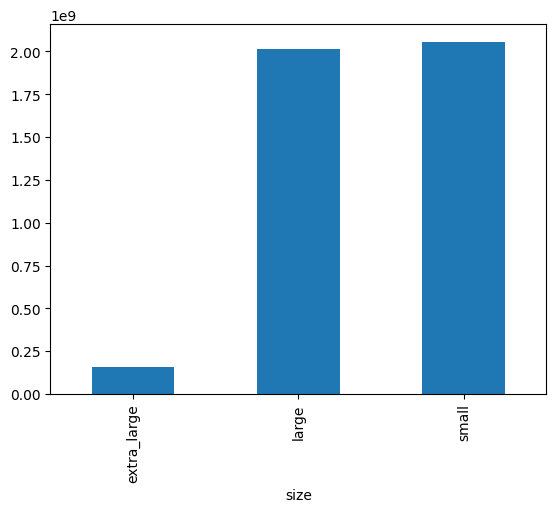

In [70]:
avocados = pd.read_pickle('avoplotto.pkl')
# Look at the first few rows of data
print(avocados.head())
# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby('size')['nb_sold'].sum()
# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind = 'bar')
# Show the plot
plt.show()

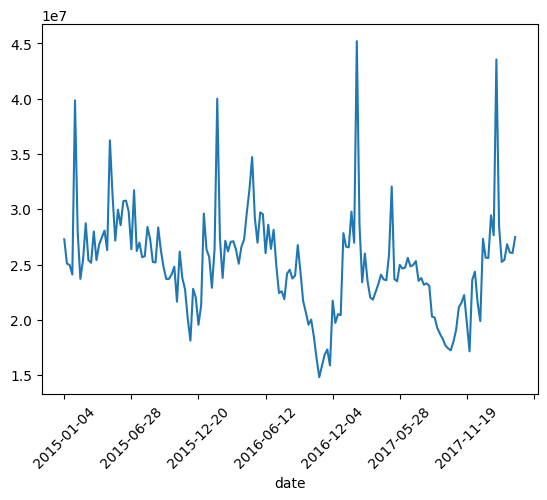

In [71]:
# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby('date')['nb_sold'].sum()
# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(kind='line', rot = 45)
# Show the plot
plt.show()

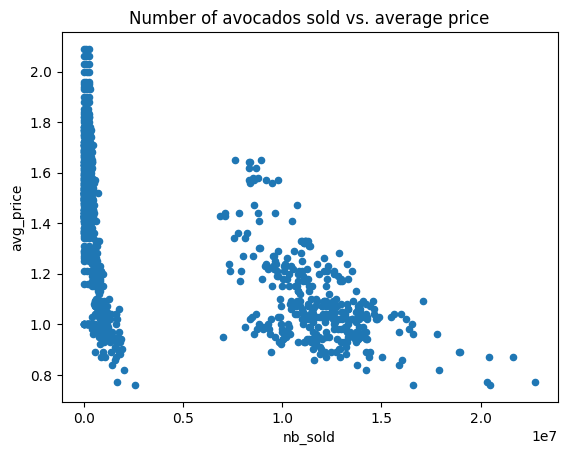

In [73]:
# Scatter plot of avg_price vs. nb_sold with title
avocados.plot(x='nb_sold', y='avg_price', kind = 'scatter', title = 'Number of avocados sold vs. average price')
# Show the plot
plt.show()

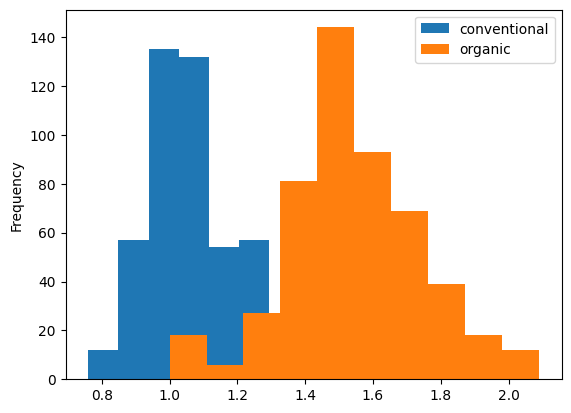

In [74]:
# Histogram of conventional avg_price
avocados[avocados['type'] == 'conventional']['avg_price'].plot(kind = 'hist')
# Histogram of organic avg_price
avocados[avocados['type'] == 'organic']['avg_price'].plot(kind = 'hist')
# Add a legend
plt.legend(['conventional','organic'])
# Show the plot
plt.show()

     Unnamed: 0.1  Unnamed: 0   date   type   year  avg_price   size  nb_sold
0           False       False  False  False  False      False  False    False
1           False       False  False  False  False      False  False    False
2           False       False  False  False  False      False  False    False
3           False       False  False  False  False      False  False    False
4           False       False  False  False  False      False  False    False
..            ...         ...    ...    ...    ...        ...    ...      ...
307         False       False  False  False  False      False  False    False
308         False       False  False  False  False      False  False    False
309         False       False  False  False  False      False  False    False
310         False       False  False  False  False      False  False    False
311         False       False  False  False  False      False  False    False

[312 rows x 8 columns]
Unnamed: 0.1    False
Unnamed: 0      Fa

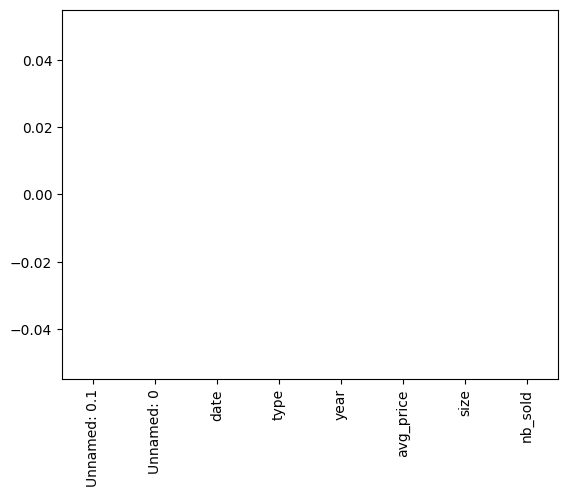

Unnamed: 0.1    False
Unnamed: 0      False
date            False
type            False
year            False
avg_price       False
size            False
nb_sold         False
dtype: bool


In [76]:
avocados_2016 = pd.read_csv('avocados_2016.csv')
# Check individual values for missing values
print(avocados_2016.isna())
# Check each column for missing values
print(avocados_2016.isna().any())
# Bar plot of missing values by variable
avocados_2016.isna().sum().plot(kind = 'bar')
# Show plot
plt.show()
# Remove rows with missing values
avocados_complete = avocados_2016.dropna()
# Check if any columns contain missing values
print(avocados_complete.isna().any())

In [77]:
gdp = pd.read_csv('WorldBank_GDP.csv')
gdp.head()

,Country Name,Country Code,Indicator Name,Year,GDP
0,China,CHN,GDP (current US$),2010,6.087160e+12
1,Germany,DEU,GDP (current US$),2010,3.417090e+12
2,Japan,JPN,GDP (current US$),2010,5.700100e+12
3,United States,USA,GDP (current US$),2010,1.499210e+13
4,China,CHN,GDP (current US$),2011,7.551500e+12


In [78]:
gdp_2010 = gdp[gdp['Year'] == 2010]
gdp_2018 = gdp[gdp['Year'] == 2018]
gdp_comparison = pd.merge(gdp_2010, gdp_2018, on='Country Name', suffixes=('_2010', '_2018'))
gdp_comparison['GDP Growth'] = gdp_comparison['GDP_2018'] - gdp_comparison['GDP_2010']
growing_countries = gdp_comparison[gdp_comparison['GDP Growth'] > 0]
print("Countries with growing GDP from 2010 to 2018:")
print(growing_countries[['Country Name', 'GDP_2010', 'GDP_2018', 'GDP Growth']])

Countries with growing GDP from 2010 to 2018:
    Country Name      GDP_2010      GDP_2018    GDP Growth
0          China  6.087160e+12  1.360820e+13  7.521040e+12
1        Germany  3.417090e+12  3.996760e+12  5.796700e+11
3  United States  1.499210e+13  2.049410e+13  5.502000e+12


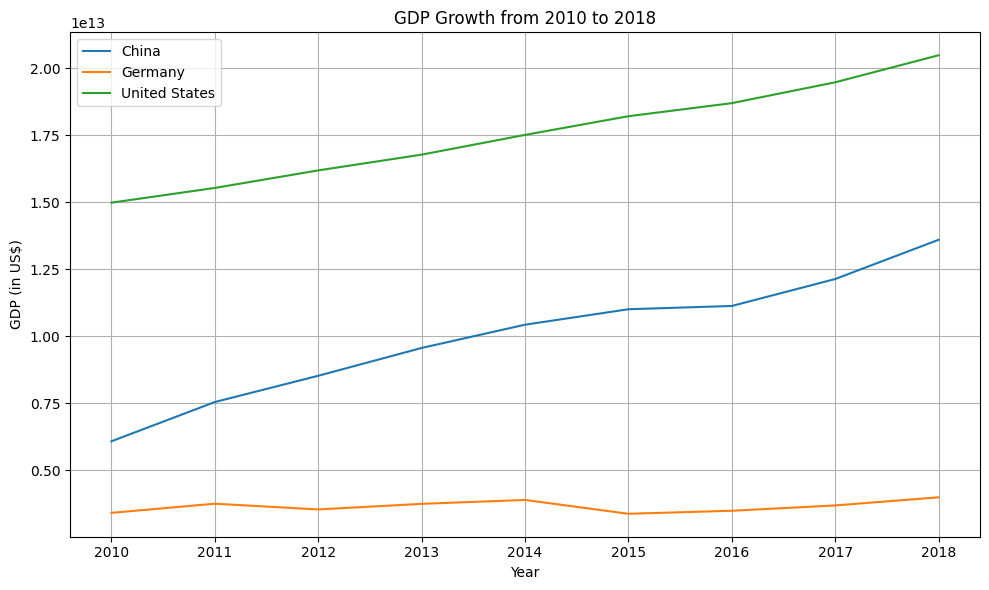

In [81]:
plt.figure(figsize=(10, 6))
for country in growing_countries['Country Name']:
    country_data = gdp[gdp['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['GDP'], label=country)

plt.xlabel('Year')
plt.ylabel('GDP (in US$)')
plt.title('GDP Growth from 2010 to 2018')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [85]:
country_avg_temp = temperatures.groupby('country')['avg_temp_c'].mean()
highest_avg_temp_country = country_avg_temp.idxmax()
highest_avg_temp = country_avg_temp.max()
print('The country with the highest avg temp is ', highest_avg_temp_country, 'with an average temperature of ', 
highest_avg_temp,'°Celsius.')

The country with the highest avg temp is  Sudan with an average temperature of  29.981780487804876 °Celsius.


In [86]:
countries_in_range = country_avg_temp[(country_avg_temp >= 20) & (country_avg_temp <= 30)]
countries_in_range

country
Angola                                24.387659
Bangladesh                            26.164378
Brazil                                23.906030
Burma                                 27.514213
Colombia                              21.649607
Congo (Democratic Republic Of The)    24.504963
Côte D'Ivoire                         26.971024
Dominican Republic                    26.852800
Egypt                                 22.044807
India                                 26.633255
Indonesia                             27.408634
Iraq                                  24.074841
Nigeria                               27.176191
Pakistan                              25.824654
Philippines                           27.153518
Saudi Arabia                          27.635610
Senegal                               25.425994
Singapore                             27.323165
Somalia                               27.963183
Sudan                                 29.981780
Taiwan                          

In [91]:
thailand_data = temperatures[(temperatures['country'] == 'Thailand') & (temperatures['date'] >= '2005-01-01') & (temperatures['date'] <= '2010-01-01')]
thailand_avg_temp = thailand_data['avg_temp_c'].mean()
print(' average temperature of Thailand during 2005-01-01 and 2010-01-01', thailand_avg_temp)

 average temperature of Thailand during 2005-01-01 and 2010-01-01 27.76014754098361
